# Figure 7 for corrigendum to 2016 JAMES Tracmip introduction paper

Data is from postprocessed npz files based on ESGF copy of TRACMIP at KIT SCC LSDFONLINE.

In [1]:
import numpy as np

# my module functions to load tracmip data, plot colors, model names etc.
import tracmip as tm

import warnings
warnings.filterwarnings("ignore")

## Obtain (u,v) wind data

In [2]:
ua_aqct = np.array(np.load('./postdata_npz/ua_aquaControlTRACMIP.zonmean.timmean.npz')['ua'])
ua_aq4x = np.array(np.load('./postdata_npz/ua_aqua4xCO2TRACMIP.zonmean.timmean.npz'  )['ua'])
ua_ldct = np.array(np.load('./postdata_npz/ua_landControlTRACMIP.zonmean.timmean.npz')['ua'])
ua_ld4x = np.array(np.load('./postdata_npz/ua_land4xCO2TRACMIP.zonmean.timmean.npz'  )['ua'])
ua_ldor = np.array(np.load('./postdata_npz/ua_landOrbitTRACMIP.zonmean.timmean.npz'  )['ua'])

In [3]:
va_aqct = np.array(np.load('./postdata_npz/va_aquaControlTRACMIP.zonmean.timmean.npz')['va'])
va_aq4x = np.array(np.load('./postdata_npz/va_aqua4xCO2TRACMIP.zonmean.timmean.npz'  )['va'])
va_ldct = np.array(np.load('./postdata_npz/va_landControlTRACMIP.zonmean.timmean.npz')['va'])
va_ld4x = np.array(np.load('./postdata_npz/va_land4xCO2TRACMIP.zonmean.timmean.npz'  )['va'])
va_ldor = np.array(np.load('./postdata_npz/va_landOrbitTRACMIP.zonmean.timmean.npz'  )['va'])

## Mass stream function

In [4]:
import sys
sys.path.append('/home/fd8940/Dropbox/Python3/mymodules')
import atmosphere as atm

In [5]:
msf_aqct = np.zeros((tm.nmod, tm.nlev, tm.nlatint)) + np.nan
msf_aq4x = np.zeros((tm.nmod, tm.nlev, tm.nlatint)) + np.nan
msf_ldct = np.zeros((tm.nmod, tm.nlev, tm.nlatint)) + np.nan
msf_ld4x = np.zeros((tm.nmod, tm.nlev, tm.nlatint)) + np.nan
msf_ldor = np.zeros((tm.nmod, tm.nlev, tm.nlatint)) + np.nan
for m in range(0, tm.nmod):
    msf_aqct[m] = atm.get_massstreamfunction(va_aqct[m, :, :], tm.lev, tm.latint)
    msf_aq4x[m] = atm.get_massstreamfunction(va_aq4x[m, :, :], tm.lev, tm.latint)
    msf_ldct[m] = atm.get_massstreamfunction(va_ldct[m, :, :], tm.lev, tm.latint)
    msf_ld4x[m] = atm.get_massstreamfunction(va_ld4x[m, :, :], tm.lev, tm.latint)
    msf_ldor[m] = atm.get_massstreamfunction(va_ldor[m, :, :], tm.lev, tm.latint)

## Plotting of figure 7 of JAMES 2016 paper

In [6]:
sinlat = np.sin(tm.latint * np.pi/180.0)

In [7]:
def make_nice_plot(ax, title):
    plt.xlim(-0.98, 0.98), plt.ylim(1000, 10)
    ax.xaxis.set_ticks([-0.866, -0.5, 0, 0.5, 0.866])
    ax.xaxis.set_ticklabels([''], fontsize=10)
    ax.yaxis.set_ticks([10, 200, 600, 1000])
    ax.yaxis.set_ticklabels([''],fontsize=10)
    plt.title(title, fontsize=14)

In [8]:
import matplotlib.pyplot as plt
from matplotlib import cm

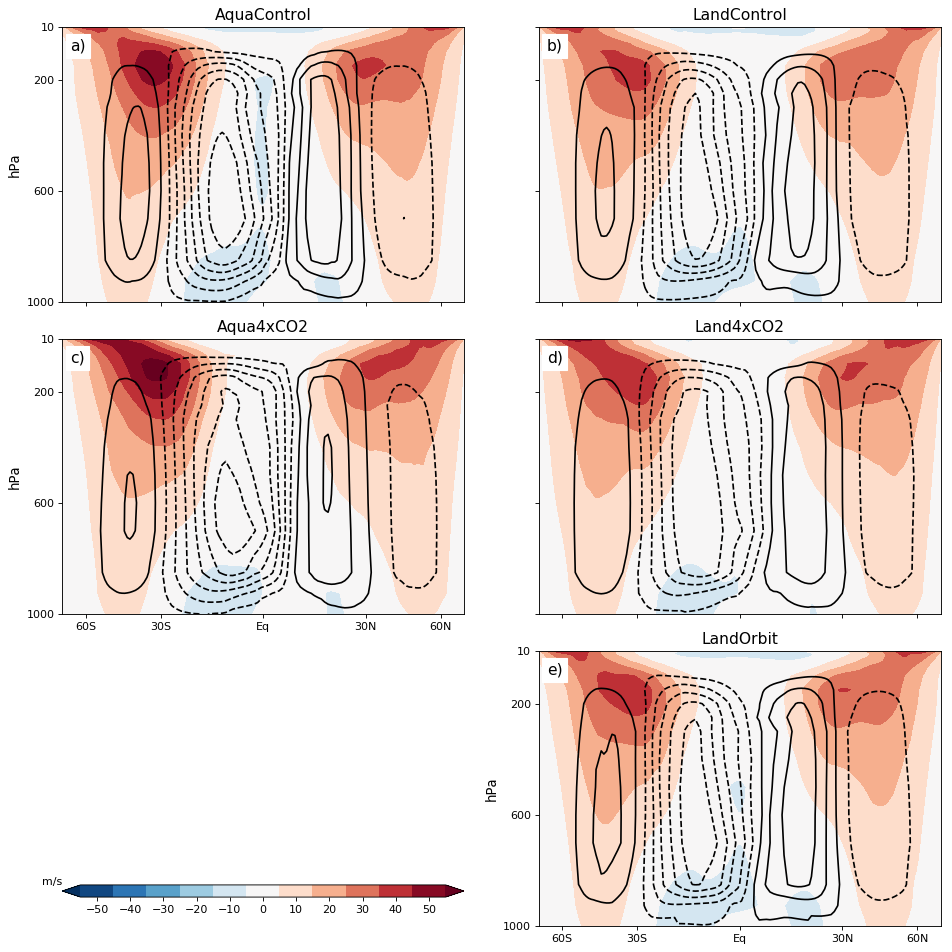

In [9]:
plt.figure(figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

cu   = np.array([-55, -45, -35, -25, -15, -5, 5,  15, 25, 35, 45, 55])
cmsf = np.array([-170, -150, -130, -110, -90, -70, -50, -30, -10, 10, 30, 50, 70, 90, 110, 130, 150, 170])

ax = plt.subplot(3, 2, 1)
plt.contourf(sinlat, tm.lev/1e2, np.nanmedian(ua_aqct[tm.modlist_aqct], axis=0), cu, cmap=cm.RdBu_r, extend='both')
plt.contour(sinlat, tm.lev/1e2, np.nanmedian(msf_aqct[tm.modlist_aqct], axis=0), cmsf, colors='k')
make_nice_plot(ax, 'AquaControl'), plt.ylabel('hPa', fontsize=12)
ax.yaxis.set_ticklabels([10, 200, 600, 1000], fontsize=10)
plt.text(0.02, 0.93, 'a)', fontsize=14, ha='left', va='center', transform=ax.transAxes, backgroundcolor='white')

ax = plt.subplot(3, 2, 3)
c=plt.contourf(sinlat, tm.lev/1e2, np.nanmedian(ua_aq4x[tm.modlist_aq4x], axis=0), cu, cmap=cm.RdBu_r, extend='both')
plt.contour(sinlat, tm.lev/1e2, np.nanmedian(msf_aq4x[tm.modlist_aq4x], axis=0), cmsf, colors='k')
make_nice_plot(ax, 'Aqua4xCO2'), plt.ylabel('hPa', fontsize=12)
ax.yaxis.set_ticklabels([10, 200, 600, 1000], fontsize=10)
ax.xaxis.set_ticklabels(['60S', '30S', 'Eq', '30N', '60N'], fontsize=10)
plt.text(0.02, 0.93, 'c)', fontsize=14, ha='left', va='center', transform=ax.transAxes, backgroundcolor='white')

ax = plt.subplot(3, 2, 5)
ax.axis('off')
cbar = plt.colorbar(c, ticks=[-50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50], 
             orientation='horizontal', aspect=30)
cbar.ax.tick_params(labelsize=10) 
plt.text(0, -0.2, 'm/s', fontsize=10, ha='right', va='center', transform=ax.transAxes)

ax = plt.subplot(3, 2, 2)
plt.contourf(sinlat, tm.lev/1e2, np.nanmedian(ua_ldct[tm.modlist_ldct], axis=0), cu, cmap=cm.RdBu_r, extend='both')
plt.contour(sinlat, tm.lev/1e2, np.nanmedian(msf_ldct[tm.modlist_ldct], axis=0), cmsf, colors='k')
make_nice_plot(ax, 'LandControl')
plt.text(0.02, 0.93, 'b)', fontsize=14, ha='left', va='center', transform=ax.transAxes, backgroundcolor='white')

ax = plt.subplot(3, 2, 4)
plt.contourf(sinlat, tm.lev/1e2, np.nanmedian(ua_ld4x[tm.modlist_ld4x], axis=0), cu, cmap=cm.RdBu_r, extend='both')
plt.contour(sinlat, tm.lev/1e2, np.nanmedian(msf_ld4x[tm.modlist_ld4x], axis=0), cmsf, colors='k')
make_nice_plot(ax, 'Land4xCO2')
plt.text(0.02, 0.93, 'd)', fontsize=14, ha='left', va='center', transform=ax.transAxes, backgroundcolor='white')

ax = plt.subplot(3, 2, 6)
plt.contourf(sinlat, tm.lev/1e2, np.nanmedian(ua_ldor[tm.modlist_ldor], axis=0), cu, cmap=cm.RdBu_r, extend='both')
plt.contour(sinlat, tm.lev/1e2, np.nanmedian(msf_ldor[tm.modlist_ldor], axis=0), cmsf, colors='k')
make_nice_plot(ax, 'LandOrbit'), plt.ylabel('hPa', fontsize=12)
ax.yaxis.set_ticklabels([10, 200, 600, 1000], fontsize=10)
ax.xaxis.set_ticklabels(['60S', '30S', 'Eq', '30N', '60N'], fontsize=10)
plt.text(0.02, 0.93, 'e)', fontsize=14, ha='left', va='center', transform=ax.transAxes, backgroundcolor='white')

plt.tight_layout()
plt.savefig('figs/corrigendumpaper_figure7.pdf')

## Annual-mean Hadley cell strength im AquaControl

In [10]:
hc_nh_aqct = np.max(np.max(msf_aqct[tm.modlist_aqct, 2:15, :], axis=2), axis=1)
hc_sh_aqct = np.min(np.min(msf_aqct[tm.modlist_aqct, 2:15, :], axis=2), axis=1)
print(hc_nh_aqct, np.nanmin(hc_nh_aqct), np.nanmax(hc_nh_aqct), np.nanmedian(hc_nh_aqct))
print(hc_sh_aqct, np.nanmin(hc_sh_aqct), np.nanmax(hc_sh_aqct), np.nanmedian(hc_sh_aqct))

[ 58.17368125  63.66144362  71.40428907  73.86193414  75.15883481
  70.71171279  82.84577069  83.74881452  98.6159635   61.24020112
  64.69015226  80.72737617  56.79915012  42.25942313] 42.2594231286 98.6159635041 71.0580009298
[-265.35017675 -122.42389789 -130.15745405 -126.19004164 -110.28357594
 -156.00430144 -142.48571947 -123.99662453 -158.3431624  -146.23121173
 -151.57538709 -129.19225441 -102.17597846  -53.23107191] -265.35017675 -53.2310719118 -129.67485423


## Annual-mean jet position
850 hPa is tm.lev = 2

In [11]:
jetlat_nh_aqct = np.zeros(tm.nmod) + np.nan
jetlat_sh_aqct = np.zeros(tm.nmod) + np.nan
for m in tm.modlist_aqct:
    jetlat_nh_aqct[m], jetlat_sh_aqct[m] = atm.get_eddyjetlat(ua_aqct[m, 2, :], tm.latint)
print(jetlat_nh_aqct, np.nanmedian(jetlat_nh_aqct))
print(jetlat_sh_aqct, np.nanmedian(jetlat_sh_aqct))

[ 51.34  45.18  49.85  46.54  45.41  45.81  45.58  42.96  42.12  46.5
  45.34  42.94  51.57  51.25] 45.695
[-41.55 -41.49 -45.97 -41.86 -41.86 -41.63 -40.97 -40.82 -37.83 -40.8
 -40.03 -41.22 -46.25 -49.  ] -41.52
